# Summarize metrics

This notebook compile all the simluations for different codes, upsampling factors, SNRs and random seeds to generate Figure 4 of Millon et al. (2024).

Author: [Martin Millon](https://martin-millon.gitlab.io), February 2024.

In [4]:
import matplotlib.pyplot as plt 
import os
import pickle as pkl
import matplotlib as mpl 
import numpy as np
mpl.rcParams['axes.labelsize']= 18

mpl.rcParams['xtick.labelsize']= 14
mpl.rcParams['xtick.direction']= 'in'
mpl.rcParams['xtick.top']= True
mpl.rcParams['xtick.minor.visible']=  True
mpl.rcParams['xtick.major.size']=  7
mpl.rcParams['xtick.minor.size']=  3

mpl.rcParams['ytick.labelsize']=  14
mpl.rcParams['ytick.direction']= 'in'
mpl.rcParams['ytick.right']=  True
mpl.rcParams['ytick.minor.visible']=  True
mpl.rcParams['ytick.major.size']=  7
mpl.rcParams['ytick.minor.size']=  3

mpl.rcParams['legend.numpoints']=  1
mpl.rcParams['legend.facecolor']=  'None'
mpl.rcParams['legend.edgecolor']=  'None'
mpl.rcParams['legend.fontsize']=  18

from matplotlib import rc
rc('font',**{'family':'serif','serif':['Times']})
rc('text', usetex=True)

## Single Seed
First, we check our results for a single random seed. 

In [5]:
instrument = 'tinytim10'
ouput = 'output_MClambda3.00'
upsamples = [1,2,3]
SNRs = [100, 1000, 10000, 100000]
seed = 0
seeds = np.arange(10)

results_folder = './data_oddkernel_6stars/%s/seed_%i/results_%s'%(instrument, seed, ouput)
results_folder_overall = './data_oddkernel_6stars/%s/results_%s'%(instrument, ouput)

psfr = True 
starred = True 
photutils = True
overall = True

In [6]:
if starred:
    with open(os.path.join(results_folder, 'starred_astro-photo_metrics.pkl'), 'rb') as f: 
        error_astrom_starred, error_photom_starred = pkl.load(f) # axis0: SNR, axis1: upsampling, axis2: error type : 1 stat error, 2 bias, 2 total
    with open(os.path.join(results_folder, 'starred_psf_metrics.pkl'), 'rb') as f: 
        psf_mean_error, psf_max_error_rel, psf_mean_error_inner = pkl.load(f) # axis0: SNR, axis1: upsampling, axis2: [up,down]

if psfr: 
    with open(os.path.join(results_folder, 'psfr_astro-photo_metrics.pkl'), 'rb') as f: 
        error_astrom_psfr, error_photom_psfr = pkl.load(f)
    with open(os.path.join(results_folder, 'psfr_psf_metrics.pkl'), 'rb') as f: 
        psf_mean_error_psfr, psf_max_error_rel_psfr, psf_mean_error_inner_psfr = pkl.load(f)

if photutils: 
    with open(os.path.join(results_folder, 'photutils_astro-photo_metrics.pkl'), 'rb') as f: 
        error_astrom_phot, error_photom_phot = pkl.load(f)
    with open(os.path.join(results_folder, 'photutils_psf_metrics.pkl'), 'rb') as f: 
        psf_mean_error_phot, psf_max_error_rel_phot, psf_mean_error_inner_phot = pkl.load(f) 

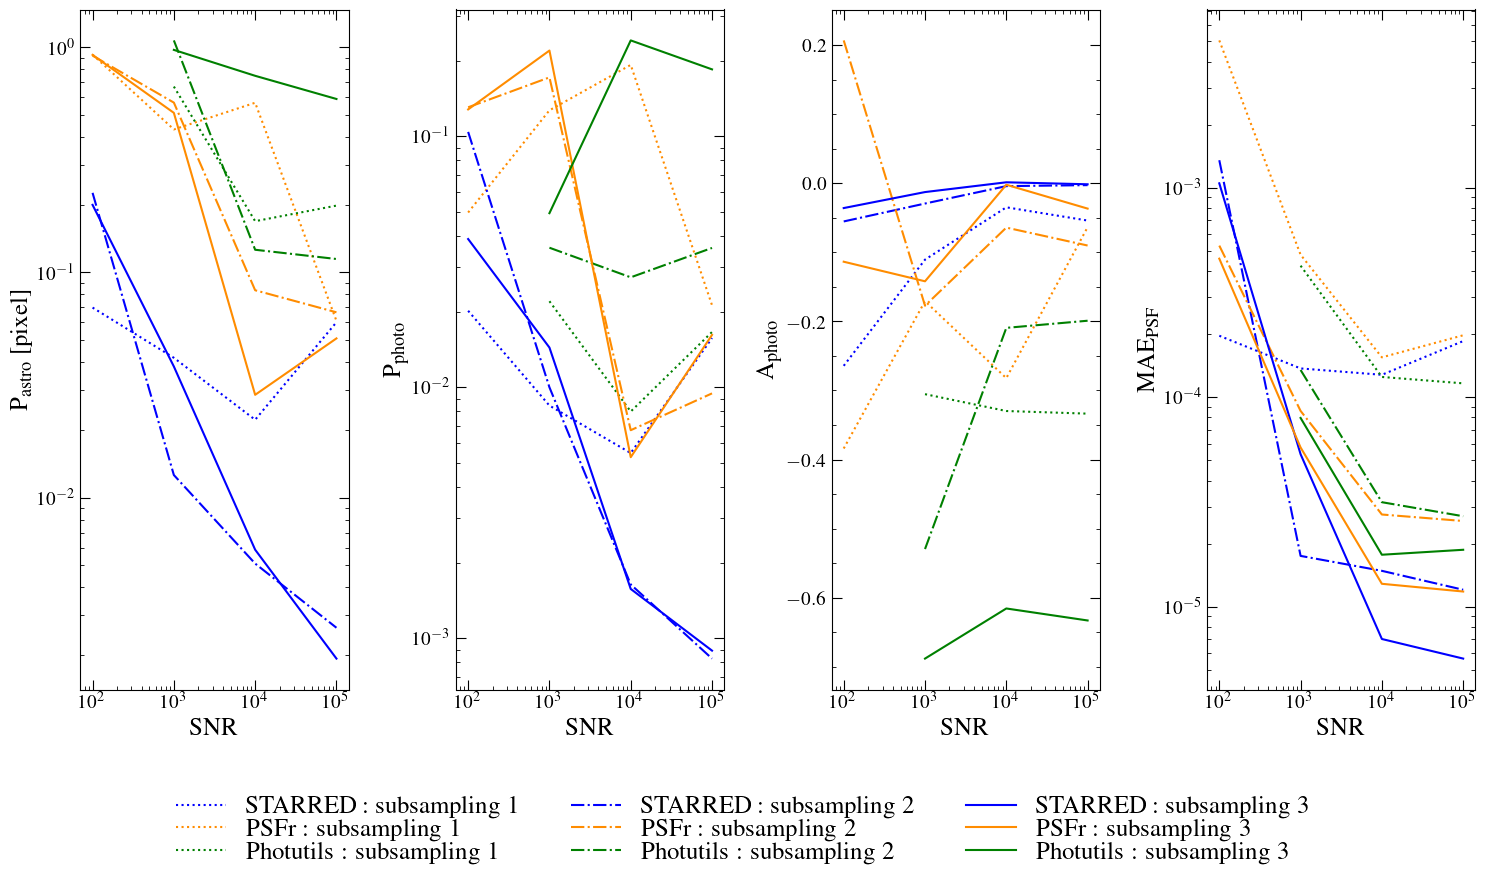

In [7]:
fig,ax = plt.subplots(1,4, figsize=(18,10))
plt.subplots_adjust(left=None, bottom=0.2, right=None, top=None, wspace=0.4, hspace=None)

colors_starred = 'b'
colors_psfr = 'darkorange'
colors_phot = 'g'

linestyles = [':',  '-.', 'solid']
start_index = 0 #if you don't want to display SNR100
start_index_photu = 1 

for k, upsample in enumerate(upsamples):
    #astrometric precision P_astro (in unit of big pixel)
    if starred:
        ax[0].plot(SNRs[start_index:], error_astrom_starred[start_index:,k,0], color=colors_starred, linestyle = linestyles[k], label='STARRED : subsampling '+str(upsample))
    if psfr:
        ax[0].plot(SNRs[start_index:], error_astrom_psfr[start_index:, k, 0], color=colors_psfr, linestyle = linestyles[k], label='PSFr : subsampling '+str(upsample))
    if photutils:
        ax[0].plot(SNRs[start_index_photu:], error_astrom_phot[start_index_photu:, k, 0], color=colors_phot, linestyle = linestyles[k], label='Photutils : subsampling '+str(upsample))
    
    ax[0].set_xlabel('SNR')
    ax[0].set_ylabel('$\mathrm{P}_{\mathrm{astro}}$ [pixel]')
    ax[0].set_xscale('log')
    ax[0].set_yscale('log')

    #photometric precision
    if starred:
        ax[1].plot(SNRs[start_index:], error_photom_starred[start_index:,k,0], color=colors_starred, linestyle = linestyles[k], label='STARRED : subsampling '+str(upsample))
    if psfr:
        ax[1].plot(SNRs[start_index:], error_photom_psfr[start_index:, k, 0], color=colors_psfr, linestyle = linestyles[k], label='PSFr : subsampling'+str(upsample))
    if photutils:
        ax[1].plot(SNRs[start_index_photu:], error_photom_phot[start_index_photu:, k, 0], color=colors_phot, linestyle = linestyles[k], label='Photutils : subsampling'+str(upsample))
    
    ax[1].set_xlabel('SNR')
    ax[1].set_ylabel('$\mathrm{P}_{\mathrm{photo}}$')
    ax[1].set_xscale('log')
    ax[1].set_yscale('log')

    #photometric bias
    if starred:
        ax[2].plot(SNRs[start_index:], error_photom_starred[start_index:,k,1], color=colors_starred, linestyle = linestyles[k], label='STARRED : subsampling '+str(upsample))
    if psfr:
        ax[2].plot(SNRs[start_index:], error_photom_psfr[start_index:, k, 1], color=colors_psfr, linestyle = linestyles[k], label='PSFr : subsampling'+str(upsample))
    if photutils:
        ax[2].plot(SNRs[start_index_photu:], error_photom_phot[start_index_photu:, k, 1], color=colors_phot, linestyle = linestyles[k], label='Photutils : subsampling'+str(upsample))
    
    ax[2].set_xlabel('SNR')
    ax[2].set_ylabel('$\mathrm{A}_{\mathrm{photo}}$')
    ax[2].set_xscale('log')
    # ax[2].set_yscale('log')

    #PSF fidelity MAE
    if starred:
        ax[3].plot(SNRs[start_index:], psf_mean_error[start_index:,k, 0], color=colors_starred, linestyle = linestyles[k], label='STARRED : subsampling '+str(upsample))
    if psfr:
        ax[3].plot(SNRs[start_index:], psf_mean_error_psfr[start_index:, k, 0], color=colors_psfr, linestyle = linestyles[k], label='PSFr : subsampling '+str(upsample))
    if photutils:
        ax[3].plot(SNRs[start_index_photu:], psf_mean_error_phot[start_index_photu:, k, 0], color=colors_phot, linestyle = linestyles[k], label='Photutils : subsampling '+str(upsample))
    
    ax[3].set_xlabel('SNR')
    ax[3].set_ylabel('$\mathrm{MAE}_{\mathrm{PSF}}$')
    ax[3].set_xscale('log')
    ax[3].set_yscale('log')

handles, labels = ax[0].get_legend_handles_labels()
plt.figlegend(handles, labels, loc = 'lower center', ncol=3, labelspacing=0.)
plt.show()

# Overall plots 

Take the mean overall all random realisation of the noise. 

In [8]:
if starred:
    with open(os.path.join(results_folder_overall, 'starred_overall_astro-photo_metrics.pkl'), 'rb') as f: 
        error_astrom_starred_o, error_photom_starred_o = pkl.load(f) # axis0: SNR, axis1: upsampling, axis2: error type : 1 precision, 2 accuracy, 3 total MAE, axis3: seed dimension
    with open(os.path.join(results_folder_overall, 'starred_overall_psf_metrics.pkl'), 'rb') as f: 
        psf_mean_error_o, psf_max_error_rel_o, psf_mean_error_inner_o = pkl.load(f) # axis0: SNR, axis1: upsampling,  axis2: [up,down], axis3: seed dimension 

if psfr: 
    with open(os.path.join(results_folder_overall, 'psfr_overall_astro-photo_metrics.pkl'), 'rb') as f: 
        error_astrom_psfr_o, error_photom_psfr_o = pkl.load(f)
    with open(os.path.join(results_folder_overall, 'psfr_overall_psf_metrics.pkl'), 'rb') as f: 
        psf_mean_error_psfr_o, psf_max_error_rel_psfr_o, psf_mean_error_inner_psfr_o = pkl.load(f) 

if photutils: 
    with open(os.path.join(results_folder_overall, 'photutils_overall_astro-photo_metrics.pkl'), 'rb') as f: 
        error_astrom_phot_o, error_photom_phot_o = pkl.load(f)
    with open(os.path.join(results_folder_overall, 'photutils_overall_psf_metrics.pkl'), 'rb') as f: 
        psf_mean_error_phot_o, psf_max_error_rel_phot_o, psf_mean_error_inner_phot_o = pkl.load(f)


In [9]:
# compute summary statistics: 

#starred: 
if starred:
    P_astro, sig_P_astro = np.nanmedian(error_astrom_starred_o[:,:,0,:], axis=2), np.nanstd(error_astrom_starred_o[:,:,0,:], axis=2)
    P_photo, sig_P_photo = np.nanmedian(error_photom_starred_o[:,:,0,:], axis=2), np.nanstd(error_photom_starred_o[:,:,0,:], axis=2)
    A_photo, sig_A_photo = np.nanmedian(error_photom_starred_o[:,:,1,:], axis=2), np.nanstd(error_photom_starred_o[:,:,1,:], axis=2)
    MAE_PSF, sig_MAE_PSF = np.nanmedian(psf_mean_error_o[:,:,0,:], axis=2), np.nanstd(psf_mean_error_o[:,:,1,:], axis=2)

#psfr
if psfr:
    P_astro_psfr, sig_P_astro_psfr = np.nanmedian(error_astrom_psfr_o[:,:,0,:], axis=2), np.nanstd(error_astrom_psfr_o[:,:,0,:], axis=2)
    P_photo_psfr, sig_P_photo_psfr= np.nanmedian(error_photom_psfr_o[:,:,0,:], axis=2), np.nanstd(error_photom_psfr_o[:,:,0,:], axis=2)
    A_photo_psfr, sig_A_photo_psfr = np.nanmedian(error_photom_psfr_o[:,:,1,:], axis=2), np.nanstd(error_photom_psfr_o[:,:,1,:], axis=2)
    MAE_PSF_psfr, sig_MAE_PSF_psfr = np.nanmedian(psf_mean_error_psfr_o[:,:,0,:], axis=2), np.nanstd(psf_mean_error_psfr_o[:,:,1,:], axis=2)

#photutils
if photutils:
    P_astro_phot, sig_P_astro_phot = np.nanmedian(error_astrom_phot_o[:,:,0,:], axis=2), np.nanstd(error_astrom_phot_o[:,:,0,:], axis=2)
    P_photo_phot, sig_P_photo_phot= np.nanmedian(error_photom_phot_o[:,:,0,:], axis=2), np.nanstd(error_photom_phot_o[:,:,0,:], axis=2)
    A_photo_phot, sig_A_photo_phot = np.nanmedian(error_photom_phot_o[:,:,1,:], axis=2), np.nanstd(error_photom_phot_o[:,:,1,:], axis=2)
    MAE_PSF_phot, sig_MAE_PSF_phot = np.nanmedian(psf_mean_error_phot_o[:,:,0,:], axis=2), np.nanstd(psf_mean_error_phot_o[:,:,0,:], axis=2)


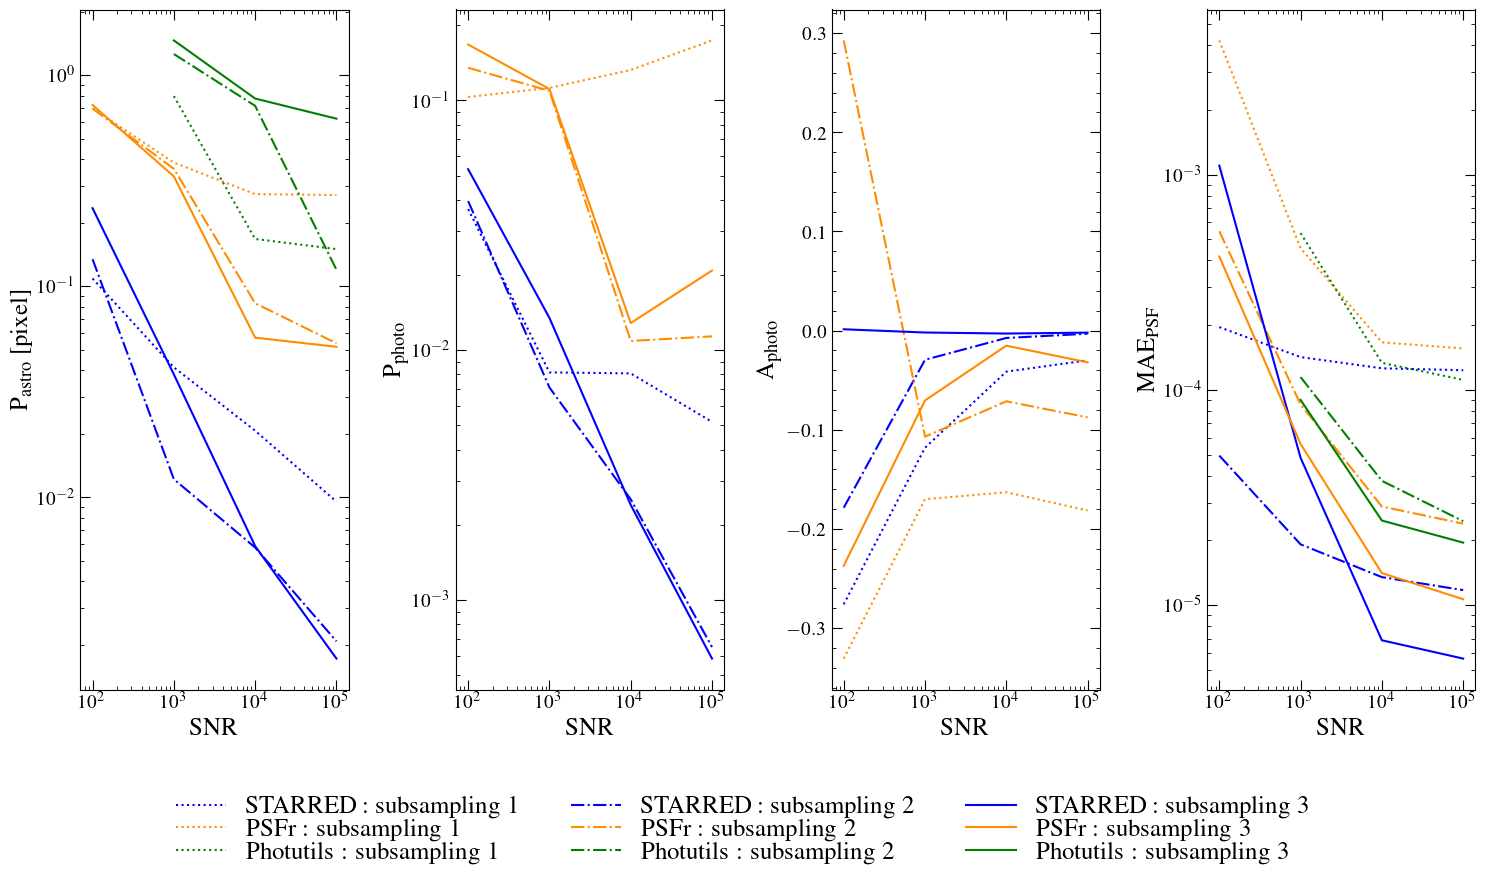

In [10]:
fig,ax = plt.subplots(1,4, figsize=(18,10))
plt.subplots_adjust(left=None, bottom=0.2, right=None, top=None, wspace=0.4, hspace=None)

for k, upsample in enumerate(upsamples):
    #astrometric precision P_astro (in unit of big pixel)
    if starred:
        ax[0].plot(SNRs[start_index:], P_astro[start_index:,k], color=colors_starred, linestyle = linestyles[k], label='STARRED : subsampling '+str(upsample))
    if psfr:
        ax[0].plot(SNRs[start_index:], P_astro_psfr[start_index:, k], color=colors_psfr, linestyle = linestyles[k], label='PSFr : subsampling '+str(upsample))
    if photutils:
        ax[0].plot(SNRs[start_index_photu:], P_astro_phot[start_index_photu:, k], color=colors_phot, linestyle = linestyles[k], label='Photutils : subsampling '+str(upsample))
    
    ax[0].set_xlabel('SNR')
    ax[0].set_ylabel('$\mathrm{P}_{\mathrm{astro}}$ [pixel]')
    ax[0].set_xscale('log')
    ax[0].set_yscale('log')

    #photometric precision 
    if starred:
        ax[1].plot(SNRs[start_index:], P_photo[start_index:,k], color=colors_starred, linestyle = linestyles[k], label='STARRED : subsampling '+str(upsample))
    if psfr:
        ax[1].plot(SNRs[start_index:], P_photo_psfr[start_index:, k,], color=colors_psfr, linestyle = linestyles[k], label='PSFr : subsampling'+str(upsample))
    if 0:
        ax[1].plot(SNRs[start_index_photu:], P_photo_phot[start_index_photu:, k,], color=colors_phot, linestyle = linestyles[k], label='Photutils : subsampling'+str(upsample))
    
    ax[1].set_xlabel('SNR')
    ax[1].set_ylabel('$\mathrm{P}_{\mathrm{photo}}$')
    ax[1].set_xscale('log')
    ax[1].set_yscale('log')

    # #photometric bias
    if starred:
        ax[2].plot(SNRs[start_index:], A_photo[start_index:,k], color=colors_starred, linestyle = linestyles[k], label='STARRED : subsampling '+str(upsample))
    if psfr:
        ax[2].plot(SNRs[start_index:], A_photo_psfr[start_index:, k], color=colors_psfr, linestyle = linestyles[k], label='PSFr : subsampling'+str(upsample))
    if 0:
        ax[2].plot(SNRs[start_index_photu:], A_photo_phot[start_index_photu:, k], color=colors_phot, linestyle = linestyles[k], label='Photutils : subsampling'+str(upsample))
    
    ax[2].set_xlabel('SNR')
    ax[2].set_ylabel('$\mathrm{A}_{\mathrm{photo}}$')
    ax[2].set_xscale('log')
    # ax[2].set_yscale('log')

    #PSF fidelity MAE
    if starred:
        ax[3].plot(SNRs[start_index:], MAE_PSF[start_index:,k], color=colors_starred, linestyle = linestyles[k], label='STARRED : subsampling '+str(upsample))
    if psfr:
        ax[3].plot(SNRs[start_index:], MAE_PSF_psfr[start_index:, k], color=colors_psfr, linestyle = linestyles[k], label='PSFr : subsampling '+str(upsample))
    if photutils:
        ax[3].plot(SNRs[start_index_photu:], MAE_PSF_phot[start_index_photu:, k], color=colors_phot, linestyle = linestyles[k], label='Photutils : subsampling '+str(upsample))
    
    ax[3].set_xlabel('SNR')
    ax[3].set_ylabel('$\mathrm{MAE}_{\mathrm{PSF}}$')
    ax[3].set_xscale('log')
    ax[3].set_yscale('log')

handles, labels = ax[0].get_legend_handles_labels()
plt.figlegend(handles, labels, loc = 'lower center', ncol=3, labelspacing=0.)
plt.savefig(os.path.join(results_folder_overall, 'metric_plots_%s_%s.pdf'%(instrument, ouput)), dpi=300)
plt.show()

In [11]:
for k, upsample in enumerate(upsamples): 
    print('Subsampling factor %i :'%upsample, A_photo[start_index:, k])
    print('Mag error : ',-2.5*np.log10(1+ A_photo[start_index:, k]))

Subsampling factor 1 : [-0.27605504 -0.11812022 -0.04139198 -0.02996843]
Mag error :  [0.35073612 0.13647653 0.04589735 0.03303533]
Subsampling factor 2 : [-0.17864975 -0.02944273 -0.00742113 -0.00316641]
Mag error :  [0.21367902 0.03244708 0.00808744 0.00344334]
Subsampling factor 3 : [ 0.00134595 -0.00191441 -0.00296896 -0.0020273 ]
Mag error :  [-0.00146036  0.00208053  0.0032283   0.00220335]
